# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [8]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [9]:
df['booking_complete'].value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

### Unbalanced dataset

In [10]:
df['booking_origin'].value_counts()

booking_origin
Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64

In [11]:
df['trip_type'].value_counts()

trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64

In [12]:
df['sales_channel'].value_counts()

sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64

In [13]:
df['sales_channel'] = df['sales_channel'].apply(lambda x: 1 if x=='Internet' else 0)

In [14]:
df.drop(columns = ['trip_type', 'booking_origin', 'route'], inplace = True)

In [15]:
df.corr()

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,0.002457,0.212606,-0.115850,0.015607,0.015407,0.120404,0.028544,0.022943,-0.063169,0.024116
sales_channel,0.002457,1.000000,0.013399,0.060352,-0.022375,-0.042095,0.054254,-0.032943,0.022235,0.038629,0.041060
purchase_lead,0.212606,0.013399,1.000000,-0.076560,0.035973,0.036531,-0.022207,-0.004499,-0.022653,0.067866,-0.022131
length_of_stay,-0.115850,0.060352,-0.076560,1.000000,-0.024872,-0.000310,0.176757,0.032264,0.098828,0.141181,-0.042408
flight_hour,0.015607,-0.022375,0.035973,-0.024872,1.000000,0.024086,-0.011434,0.012171,0.013014,-0.002101,0.007127
flight_day,0.015407,-0.042095,0.036531,-0.000310,0.024086,1.000000,-0.002503,0.005392,0.009281,0.018434,-0.006986
wants_extra_baggage,0.120404,0.054254,-0.022207,0.176757,-0.011434,-0.002503,1.000000,0.207669,0.216470,0.057054,0.068139
wants_preferred_seat,0.028544,-0.032943,-0.004499,0.032264,0.012171,0.005392,0.207669,1.000000,0.315088,0.101289,0.050116
wants_in_flight_meals,0.022943,0.022235,-0.022653,0.098828,0.013014,0.009281,0.216470,0.315088,1.000000,0.154312,0.026511
flight_duration,-0.063169,0.038629,0.067866,0.141181,-0.002101,0.018434,0.057054,0.101289,0.154312,1.000000,-0.106266


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

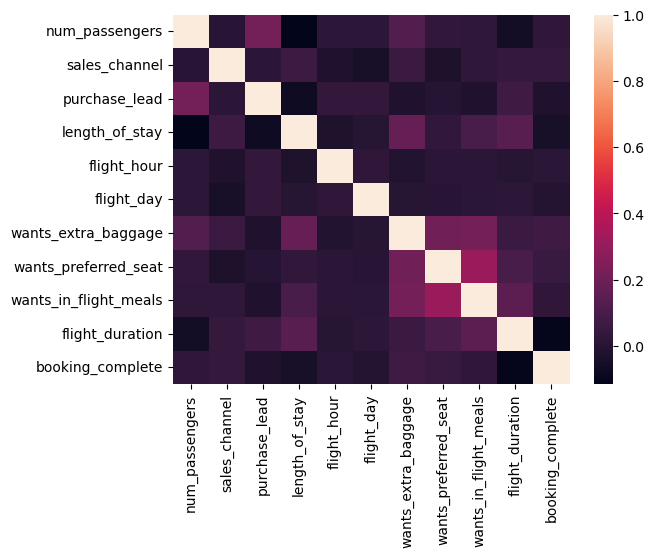

In [19]:
sns.heatmap(df.corr())
plt.show()

,Columns,Correlation
9,flight_duration,-0.106266
3,length_of_stay,-0.042408
2,purchase_lead,-0.022131
5,flight_day,-0.006986
4,flight_hour,0.007127
0,num_passengers,0.024116
8,wants_in_flight_meals,0.026511
1,sales_channel,0.041060
7,wants_preferred_seat,0.050116
6,wants_extra_baggage,0.068139


In [48]:
df['booking_complete'].value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [49]:
class_0 = df[df['booking_complete']==0]
class_1 = df[df['booking_complete']==1]

In [51]:
class_1.shape[0]

7478

total class of 1 and 0: booking_complete
1    42522
0    42522
Name: count, dtype: int64


<Axes: title={'center': 'count (target)'}, xlabel='booking_complete'>

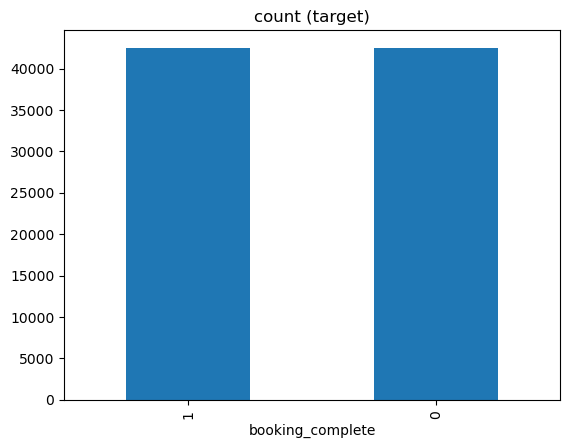

In [69]:
class_1_over = class_1.sample(class_0.shape[0], replace=True)

test_over1 = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:",test_over1['booking_complete'].value_counts())# plot the count after under-sampeling
test_over1['booking_complete'].value_counts().plot(kind='bar', title='count (target)')

In [86]:
cols = []
cors = []
for i in test_over1.columns:
    if i!='booking_complete':
        cor = test_over1[i].corr(test_over1['booking_complete'])
        cols.append(i)
        cors.append(cor)

data = pd.DataFrame()
data['Columns'] = cols
data['Correlation'] = cors

In [87]:
data.sort_values('Correlation')

,Columns,Correlation
9,flight_duration,-0.148322
3,length_of_stay,-0.055994
2,purchase_lead,-0.031726
5,flight_day,-0.009249
4,flight_hour,0.010581
0,num_passengers,0.038174
8,wants_in_flight_meals,0.039689
1,sales_channel,0.065011
7,wants_preferred_seat,0.070736
6,wants_extra_baggage,0.105563


In [70]:
from sklearn.model_selection import train_test_split

X = test_over1.drop(columns=['booking_complete'])
Y = test_over1['booking_complete']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

In [72]:
model = RandomForestClassifier()

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [73]:
precision_score(y_test, y_pred)

0.9334341906202723

In [74]:
recall_score(y_test, y_pred)

0.9892483259454872

In [75]:
f1_score(y_test,y_pred)

0.9605311355311356

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [84]:
models = [['Logistic' , LogisticRegression()],
          ['Extra Tree', ExtraTreesClassifier()],
         ['DecisionTree',DecisionTreeClassifier()],
         ['BernolliNB', BernoulliNB()],
         ['GaussianNB', GaussianNB()],
         ['KNeighbor',KNeighborsClassifier()]]

In [85]:
%%time
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    pre = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test,y_pred)

    print(f"{name} : Precision {pre} : Recall {rec} : F1 Score {f1}")

A:\Anaconda\ProgramData\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic : Precision 0.5969086651053864 : Recall 0.6009619918890879 : F1 Score 0.5989284707209324
Extra Tree : Precision 0.9604840927844503 : Recall 0.9880222578515514 : F1 Score 0.9740585774058578
DecisionTree : Precision 0.850487012987013 : Recall 0.9882108837121569 : F1 Score 0.914190987218078
BernolliNB : Precision 0.5421541515989505 : Recall 0.7211166650947844 : F1 Score 0.6189589573382983
GaussianNB : Precision 0.5804130692398849 : Recall 0.646703763085919 : F1 Score 0.6117678547530891
KNeighbor : Precision 0.7071238151658767 : Recall 0.9005941714609073 : F1 Score 0.7922180279586842
CPU times: total: 16.6 s
Wall time: 16.2 s
